In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split 
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [2]:
train = pd.read_csv('D:\Jupyter Notebook\Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [4]:
train.replace({'LF':'Low Fat', 'reg' : 'Regular', 'low fat':'Low Fat'}, inplace = True)

In [5]:
cat_columns = train.select_dtypes('object').columns
train[cat_columns] = train[cat_columns].apply(lambda x: x.str.replace(' ', '_'))
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier_1,Supermarket_Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft_Drinks,48.2692,OUT018,2009,Medium,Tier_3,Supermarket_Type2,443.4228
2,FDN15,17.50,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier_1,Supermarket_Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits_and_Vegetables,182.0950,OUT010,1998,NaN,Tier_3,Grocery_Store,732.3800
4,NCD19,8.93,Low_Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier_3,Supermarket_Type1,994.7052


In [6]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.groupby(['Outlet_Type', 'Outlet_Size'], dropna = False).aggregate({'Outlet_Size':'size'}).unstack()

Outlet_Size                       
Outlet_Size              High Medium   Small     NaN
Outlet_Type                                         
Grocery_Store             NaN    NaN   528.0   555.0
Supermarket_Type1       932.0  930.0  1860.0  1855.0
Supermarket_Type2         NaN  928.0     NaN     NaN
Supermarket_Type3         NaN  935.0     NaN     NaN

In [8]:
train.groupby(['Outlet_Location_Type', 'Outlet_Size'], dropna = False).aggregate({'Outlet_Size':'size'}).unstack()


Outlet_Size                        
Outlet_Size                 High  Medium   Small     NaN
Outlet_Location_Type                                    
Tier_1                       NaN   930.0  1458.0     NaN
Tier_2                       NaN     NaN   930.0  1855.0
Tier_3                     932.0  1863.0     NaN   555.0

In [9]:
train.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'], dropna = False).aggregate({'Outlet_Size':'size'}).unstack()

Outlet_Size                      
Outlet_Size                                   High Medium  Small     NaN
Outlet_Location_Type Outlet_Type                                        
Tier_1               Grocery_Store             NaN    NaN  528.0     NaN
                     Supermarket_Type1         NaN  930.0  930.0     NaN
Tier_2               Supermarket_Type1         NaN    NaN  930.0  1855.0
Tier_3               Grocery_Store             NaN    NaN    NaN   555.0
                     Supermarket_Type1       932.0    NaN    NaN     NaN
                     Supermarket_Type2         NaN  928.0    NaN     NaN
                     Supermarket_Type3         NaN  935.0    NaN     NaN

In [10]:
train.Outlet_Size.fillna('Small', inplace = True)

In [11]:
train[['Item_Weight', 'Item_Fat_Content', 'Item_Type']]

,Item_Weight,Item_Fat_Content,Item_Type
0,9.300,Low_Fat,Dairy
1,5.920,Regular,Soft_Drinks
2,17.500,Low_Fat,Meat
3,19.200,Regular,Fruits_and_Vegetables
4,8.930,Low_Fat,Household
...,...,...,...
8518,6.865,Low_Fat,Snack_Foods
8519,8.380,Regular,Baking_Goods
8520,10.600,Low_Fat,Health_and_Hygiene
8521,7.210,Regular,Snack_Foods


In [12]:
weight_mask = train.groupby(['Item_Fat_Content', 'Item_Type']).aggregate({'Item_Weight':'mean'})
weight_mask.columns = ['Mean_Item_Weight']
weight_mask.reset_index(inplace=True)
weight_mask.head()

,Item_Fat_Content,Item_Type,Mean_Item_Weight
0,Low_Fat,Baking_Goods,12.552996
1,Low_Fat,Breads,12.429912
2,Low_Fat,Breakfast,11.849412
3,Low_Fat,Canned,11.864650
4,Low_Fat,Dairy,13.391497


In [13]:
impute_weights = train[['Item_Weight', 'Item_Fat_Content', 'Item_Type']]
impute_weights = impute_weights[pd.isnull(impute_weights.Item_Weight)].\
                merge(weight_mask, how = 'left', left_on = ['Item_Fat_Content', 'Item_Type'], right_on = ['Item_Fat_Content', 'Item_Type'])
impute_weights = impute_weights.Mean_Item_Weight
impute_weights 

0       13.707177
1       11.400328
2       12.013303
3       12.552996
4       12.804289
          ...    
1458    11.963444
1459    11.963444
1460    13.853285
1461    13.708363
1462    13.384736
Name: Mean_Item_Weight, Length: 1463, dtype: float64

In [14]:
train.loc[pd.isnull(train.Item_Weight), 'Item_Weight'] = impute_weights.values

In [15]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food',
                                                               'NC': 'Non-Consumable',
                                                               'DR': 'Drinks'})
train['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [16]:
train_new = train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)
train_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,Low_Fat,0.016047,Dairy,249.8092,Medium,Tier_1,Supermarket_Type1,3735.1380,Food
1,5.92,Regular,0.019278,Soft_Drinks,48.2692,Medium,Tier_3,Supermarket_Type2,443.4228,Drinks
2,17.50,Low_Fat,0.016760,Meat,141.6180,Medium,Tier_1,Supermarket_Type1,2097.2700,Food
3,19.20,Regular,0.000000,Fruits_and_Vegetables,182.0950,Small,Tier_3,Grocery_Store,732.3800,Food
4,8.93,Low_Fat,0.000000,Household,53.8614,High,Tier_3,Supermarket_Type1,994.7052,Non-Consumable


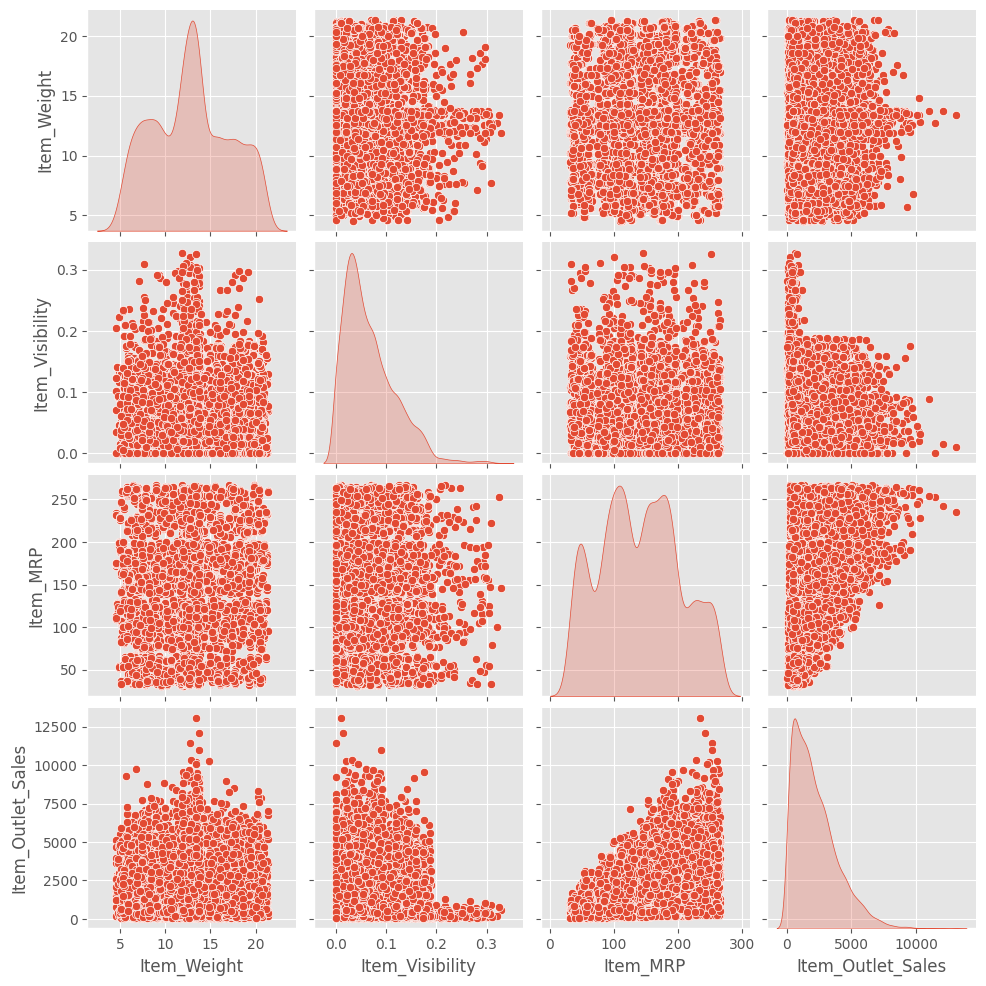

In [17]:
sns.pairplot(train_new, diag_kind='kde')
plt.show()

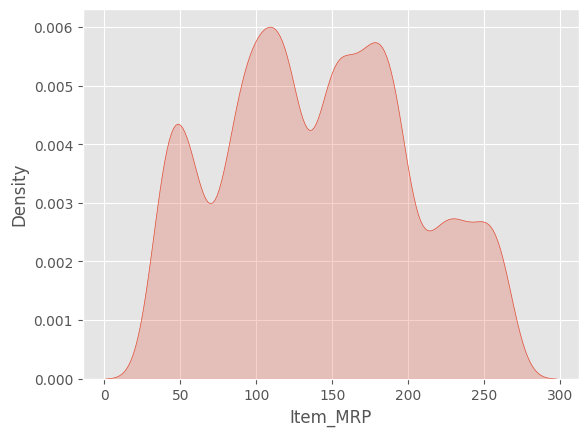

In [18]:
sns.kdeplot(train_new.Item_MRP, fill = True)
plt.show()

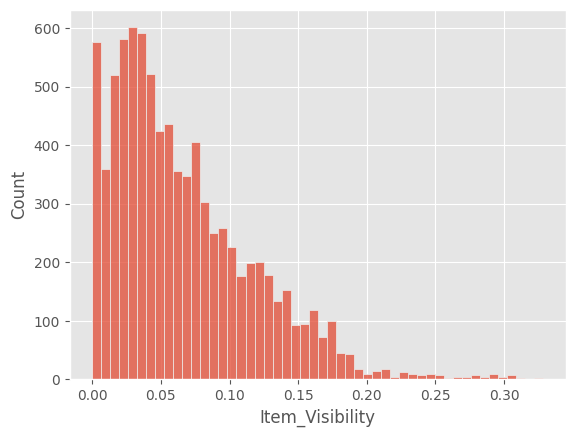

In [19]:
sns.histplot(train_new.Item_Visibility)
plt.show()

In [20]:
X = train_new.drop('Item_Outlet_Sales', axis = 1)
y = train_new['Item_Outlet_Sales']

In [21]:
X.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Type_Combined       object
dtype: object

In [22]:
num_columns = X.select_dtypes(['int', 'float']).columns
cat_columns = X.select_dtypes(['object']).columns
num_columns, cat_columns

(Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object'),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Type_Combined'],
       dtype='object'))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [38]:
feature_columns = []

for feature_name in cat_columns:
    vocabulary = X[feature_name].unique()
    feature_col = tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
    feature_col_embed = tf.feature_column.embedding_column(feature_col, dimension = 5)
    feature_columns.append(feature_col_embed)

for feature_name in num_columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

In [39]:
def make_input_fn(data_df, label_df, num_echos = 10, batch_size = 32, shuffle = True):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_echos)
        return ds
    return input_function
train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_echos = 1, shuffle = False)

In [40]:
DNNmodel = tf.estimator.DNNRegressor(
    feature_columns = feature_columns,
    hidden_units = [30, 15, 10, 15, 30],
    optimizer = 'Adam',
    activation_fn = tf.nn.relu
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ungdu\\AppData\\Local\\Temp\\tmpy82jh3ma', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [41]:
DNNmodel.train(input_fn = train_input_fn, steps = 3000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ungdu\AppData\Local\Temp\tmpy82jh3ma\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 132442830.0, step = 1
INFO:tensorflow:global_step/sec: 117.859
INFO:tensorflow:loss = 47417220.0, step = 101 (0.851 sec)
INFO:tensorflow:global_step/sec: 336.91
INFO:tensorflow:loss = 61279590.0, step = 201 (0.297 sec)
INFO:tensorflow:global_step/sec: 354.83
INFO:tensorflow:loss = 84635050.0, step = 301 (0.282 sec)
INFO:tensorflow:global_step/sec: 363.86
INFO:tensorflow:loss = 45052040.0, step = 401 (0.275 sec)
INFO:tensorflow:global_step/sec: 353.577
INFO:tensorflow:loss = 45668584

In [42]:
result = DNNmodel.evaluate(test_input_fn)
result

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-06-10T02:30:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ungdu\AppData\Local\Temp\tmpy82jh3ma\model.ckpt-2140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.31119s
INFO:tensorflow:Finished evaluation at 2023-06-10-02:30:45
INFO:tensorflow:Saving dict for global step 2140: average_loss = 1041030.7, global_step = 2140, label/mean = 2097.008, loss = 32869580.0, prediction/mean = 2087.9587
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2140: C:\Users\ungdu\AppData\Local\Temp\tmpy82jh3ma\model.ckpt-2140


{'average_loss': 1041030.7,
 'label/mean': 2097.008,
 'loss': 32869580.0,
 'prediction/mean': 2087.9587,
 'global_step': 2140}

In [43]:
from sklearn.metrics import r2_score
y_pred = DNNmodel.predict(test_input_fn)
y_pred = list(y_pred)
y_predict = []
for elem in y_pred:
    y_predict.append(elem['predictions'][0])
print("R2 Score: ", r2_score(y_test, y_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ungdu\AppData\Local\Temp\tmpy82jh3ma\model.ckpt-2140
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
R2 Score:  0.6169822623640044
